### Overlaying published DC2 subclusters

### Guimaaes DC2 clusters:
* DC2_FCER1A: CD1C, FCER1A, CLEC10A 
* DC2_AREG: AREG
* DC2_CCD207: CD207, CD1A
* DC3_CD14: CD14, S100A9, S100A8, VCAN, LYZ
* DC4_FCGR3A: FCGR3A, FTL, SERPINA1
* DC_CXCL8: CXCL8, CXCL2

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [3]:
# read in data
data = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

In [4]:
data

AnnData object with n_obs × n_vars = 30241 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotatio

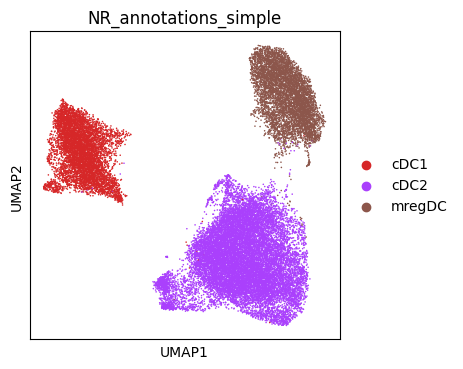

In [5]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=["NR_annotations_simple"], ncols=1, size=5)

### Guimaaes DC2 clusters:
* DC2_FCER1A: CD1C, FCER1A, CLEC10A 
* DC2_AREG: AREG
* DC2_CCD207: CD207, CD1A
* DC3_CD14: CD14, S100A9, S100A8, VCAN, LYZ
* DC4_FCGR3A: FCGR3A, FTL, SERPINA1
* DC_CXCL8: CXCL8, CXCL2

In [6]:
#define DC subset gene sets from Guimaaes et al
DC2_FCER1A = ['CD1C', 'FCER1A', 'CLEC10A']
DC2_AREG = ['AREG']
DC2_CD207 = ['CD207','CD1A']
DC3_CD14 = ['CD14', 'S100A9', 'S100A8', 'VCAN', 'LYZ']
DC4_FCGR3A = ['FCGR3A', 'FTL', 'SERPINA1']
DC_CXCL8 = ['CXCL8','CXCL2']


In [7]:
# Define dictionary of gene sets
gene_sets = {
    "DC2_FCER1A_sig": DC2_FCER1A,
    "DC2_AREG_sig": DC2_AREG,
    "DC2_CD207_sig": DC2_CD207,
    "DC3_CD14_sig": DC3_CD14,
    "DC4_FCGR3A_sig": DC4_FCGR3A,
    "DC_CXCL8_sig": DC_CXCL8
}

In [8]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [9]:
colour_vars = ["DC2_FCER1A_sig","DC2_AREG_sig","DC2_CD207_sig","DC3_CD14_sig","DC4_FCGR3A_sig","DC_CXCL8_sig","NR_annotations_simple"]

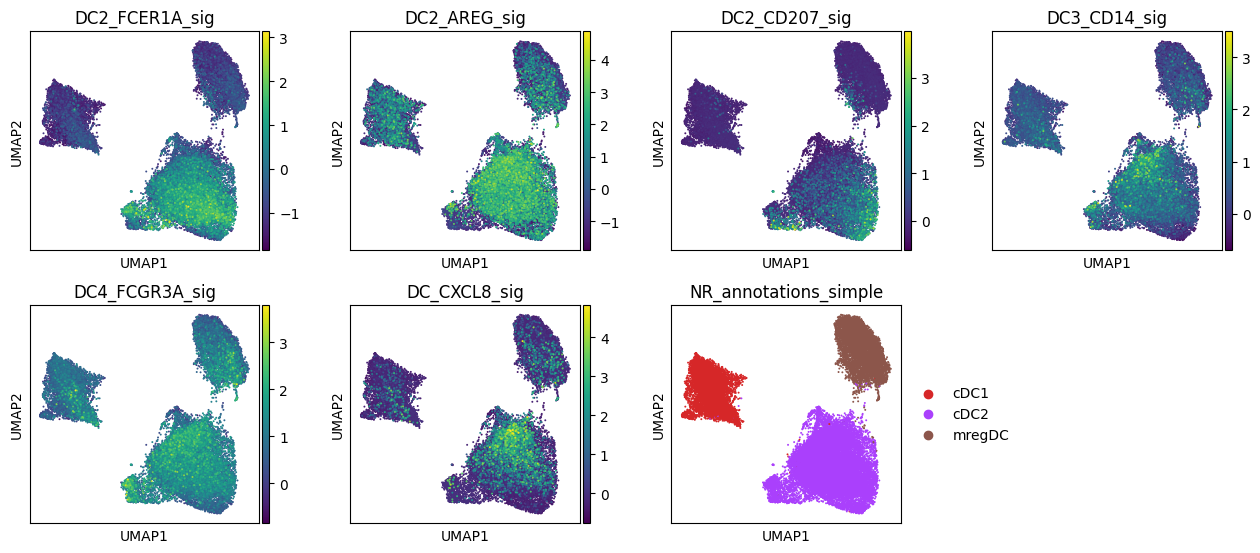

In [15]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=8)

### ^ Note no CXCL8, so DC_CXCL8 is just CXCL2 sig

### Cheng DC2 clusters:
* DC2_CXCR4 --> CXCR4
* DC2_CD1A --> CD1A, CD207
* DC2_IL1B --> CD163, CD14, IL1B, TNF, CCL3, CCL4
* DC2_FCN1 --> CD163, CD14, FCN1
* DC2_ISG15 --> ISG15, IFIT6, IFIT1
* DC2_CXCL9 --> CXCL9

In [16]:
#define DC subset gene sets from Guimaaes et al
DC2_CXCR4 = ['CXCR4']
DC2_CD1A = ['CD1A','CD207']
DC2_IL1B = ['CD163','CD14','IL1B','TNF','CCL3','CCL4']
DC3_FCN1 = ['CD163', 'CD14', 'FCN1']
DC4_ISG15 = ['ISG15', 'IFIT6', 'IFIT1']
DC_CXCL9 = ['CXCL9']

In [17]:
# Define dictionary of gene sets
gene_sets = {
    "DC2_CXCR4_sig": DC2_CXCR4,
    "DC2_CD1A_sig": DC2_CD1A,
    "DC2_IL1B_sig": DC2_IL1B,
    "DC3_FCN1_sig": DC3_FCN1,
    "DC4_ISG15_sig": DC4_ISG15,
    "DC_CXCL9_sig": DC_CXCL9
}

In [18]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [19]:
colour_vars = ["DC2_CXCR4_sig","DC2_CD1A_sig","DC2_IL1B_sig","DC3_FCN1_sig","DC4_ISG15_sig","DC_CXCL9_sig","NR_annotations_simple"]

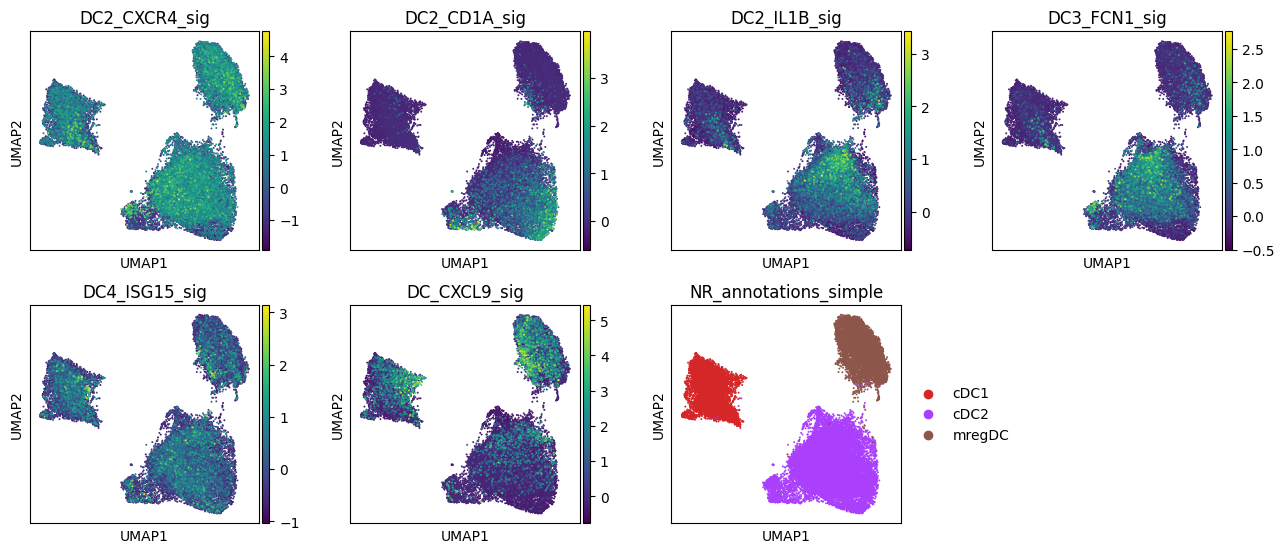

In [20]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=8)